<a href="https://colab.research.google.com/github/musmanghani091995/london-housing-price-prediction/blob/main/London_House_Prices_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn essentials
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For scaling (good habit for regression problems)
from sklearn.preprocessing import StandardScaler

# For regularized regression later (Ridge, Lasso)
from sklearn.linear_model import Ridge, Lasso


In [135]:
# Load dataset
df = pd.read_csv("London.csv")

# Check the shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3480, 11)


,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [136]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


,0
Unnamed: 0,0
Property Name,0
Price,0
House Type,0
Area in sq ft,0
No. of Bedrooms,0
No. of Bathrooms,0
No. of Receptions,0
Location,962
City/County,0


In [137]:
df=df.drop(['Unnamed: 0', 'Property Name', 'No. of Bathrooms', 'No. of Receptions' , 'City/County' , 'Postal Code'], axis=1)

In [138]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            3480 non-null   int64 
 1   House Type       3480 non-null   object
 2   Area in sq ft    3480 non-null   int64 
 3   No. of Bedrooms  3480 non-null   int64 
 4   Location         2518 non-null   object
dtypes: int64(3), object(2)
memory usage: 136.1+ KB


,Price,Area in sq ft,No. of Bedrooms
count,3.480000e+03,3480.000000,3480.000000
mean,1.864173e+06,1712.973563,3.103736
std,2.267283e+06,1364.259351,1.517698
min,1.800000e+05,274.000000,0.000000
25%,7.500000e+05,834.000000,2.000000
50%,1.220000e+06,1310.000000,3.000000
75%,2.150000e+06,2157.250000,4.000000
max,3.975000e+07,15405.000000,10.000000


In [139]:
df['Location'].mode()

,Location
0,Putney


In [140]:
df['Location'].value_counts()

,count
Location,
Putney,96
Barnes,71
Wandsworth,70
Wimbledon,68
Esher,64
...,...
161 Millbank,1
25 Cork Street,1
112 York Road,1


In [141]:
'''This will fill the missing loactions with random selection
using next or previous location
df['Location']=df['Location'].fillna(
    np.random.choice(df['Location'].dropna())
)'''

df['Location'].fillna('Others', inplace=True)


/tmp/ipython-input-1211397162.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('Others', inplace=True)


In [142]:
df.isnull().sum()

,0
Price,0
House Type,0
Area in sq ft,0
No. of Bedrooms,0
Location,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            3480 non-null   int64 
 1   House Type       3480 non-null   object
 2   Area in sq ft    3480 non-null   int64 
 3   No. of Bedrooms  3480 non-null   int64 
 4   Location         3480 non-null   object
dtypes: int64(3), object(2)
memory usage: 136.1+ KB


In [144]:
df.describe()

,Price,Area in sq ft,No. of Bedrooms
count,3.480000e+03,3480.000000,3480.000000
mean,1.864173e+06,1712.973563,3.103736
std,2.267283e+06,1364.259351,1.517698
min,1.800000e+05,274.000000,0.000000
25%,7.500000e+05,834.000000,2.000000
50%,1.220000e+06,1310.000000,3.000000
75%,2.150000e+06,2157.250000,4.000000
max,3.975000e+07,15405.000000,10.000000


In [145]:
df.isnull().values.any()

np.False_

In [146]:
df.duplicated().sum()

np.int64(5)

In [147]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3480, 5)


,Price,House Type,Area in sq ft,No. of Bedrooms,Location
0,1675000,House,2716,5,Wimbledon
1,650000,Flat / Apartment,814,2,Clerkenwell
2,735000,Flat / Apartment,761,2,Putney
3,1765000,House,1986,4,Putney
4,675000,Flat / Apartment,700,2,Putney


In [148]:
df['House Type']= df['House Type'].astype('category')
df['Location']= df['Location'].astype('category')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Price            3480 non-null   int64   
 1   House Type       3480 non-null   category
 2   Area in sq ft    3480 non-null   int64   
 3   No. of Bedrooms  3480 non-null   int64   
 4   Location         3480 non-null   category
dtypes: category(2), int64(3)
memory usage: 113.5 KB


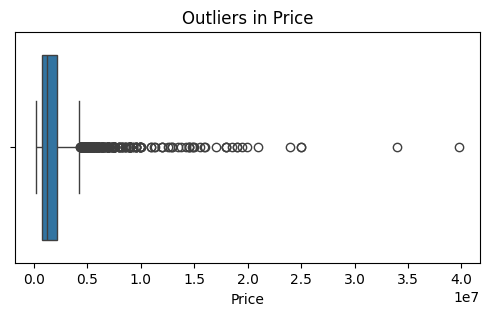

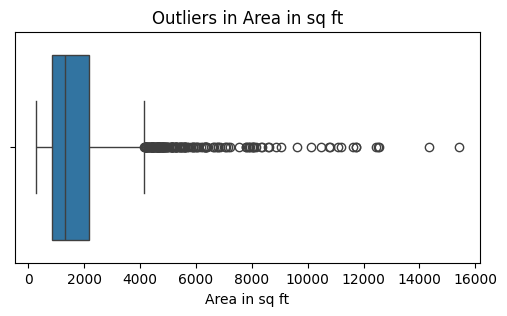

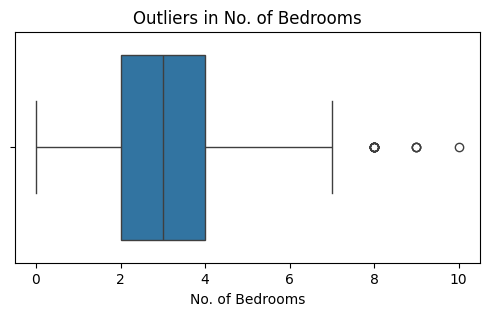

In [150]:
num_cols=df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [151]:
from scipy import stats

for col in num_cols:
    z=np.abs(stats.zscore(df[col]))
    print(f"{col} -> {(z > 3).sum()} outliers")

Price -> 64 outliers
Area in sq ft -> 58 outliers
No. of Bedrooms -> 14 outliers


In [92]:
z=np.abs(stats.zscore(df[num_cols]))
outliers=df[(z > 3).any(axis=1)]
print(outliers)

         Price        House Type  Area in sq ft  No. of Bedrooms  \
15    12500000             House           4596                6   
22     8950000   New development           3154                4   
43     9975000             House          10100               10   
68     2500000             House           5999                7   
120    4750000             House           6602                6   
...        ...               ...            ...              ...   
3453   9950000  Flat / Apartment           1682                2   
3463  11300000         Penthouse           3817                4   
3464   9300000   New development           2496                3   
3466   6250000             House          10764                6   
3473  19950000  Flat / Apartment           3698                5   

                Location  
15          Regents Park  
22    10 Draycott Avenue  
43             Battersea  
68             Northwood  
120            Wimbledon  
...                  

In [153]:
df['LogPrice']=np.log(df['Price'])
df['Log Area in sq ft']=np.log(df['Area in sq ft'])

In [154]:
print(df['LogPrice'])
print(df['Log Area in sq ft'])

0       14.331324
1       13.384728
2       13.507626
3       14.383661
4       13.422468
          ...    
3475    15.024471
3476    15.478489
3477    15.606436
3478    15.656060
3479    15.973070
Name: LogPrice, Length: 3480, dtype: float64
0       7.906915
1       6.701960
2       6.634633
3       7.593878
4       6.551080
          ...   
3475    7.251345
3476    7.466799
3477    8.397283
3478    7.317212
3479    8.593228
Name: Log Area in sq ft, Length: 3480, dtype: float64


In [155]:
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,LogPrice,Log Area in sq ft
0,1675000,House,2716,5,Wimbledon,14.331324,7.906915
1,650000,Flat / Apartment,814,2,Clerkenwell,13.384728,6.701960
2,735000,Flat / Apartment,761,2,Putney,13.507626,6.634633
3,1765000,House,1986,4,Putney,14.383661,7.593878
4,675000,Flat / Apartment,700,2,Putney,13.422468,6.551080


In [156]:
df=df.drop(['Price', 'Area in sq ft'], axis=1)

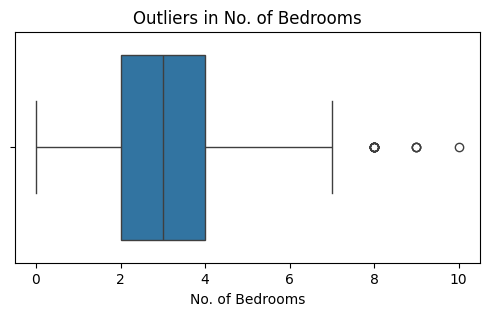

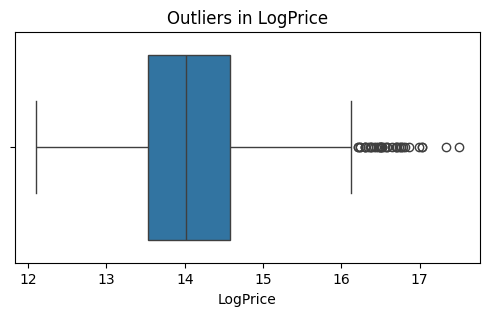

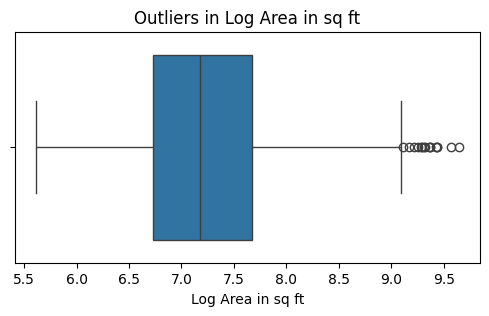

In [157]:
num_cols=df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [158]:
from scipy import stats

for col in num_cols:
    z=np.abs(stats.zscore(df[col]))
    print(f"{col} -> {(z > 3).sum()} outliers")

No. of Bedrooms -> 14 outliers
LogPrice -> 29 outliers
Log Area in sq ft -> 15 outliers


In [159]:
df.head()

,House Type,No. of Bedrooms,Location,LogPrice,Log Area in sq ft
0,House,5,Wimbledon,14.331324,7.906915
1,Flat / Apartment,2,Clerkenwell,13.384728,6.701960
2,Flat / Apartment,2,Putney,13.507626,6.634633
3,House,4,Putney,14.383661,7.593878
4,Flat / Apartment,2,Putney,13.422468,6.551080


In [160]:
df["House Type"].unique()

['House', 'Flat / Apartment', 'New development', 'Duplex', 'Penthouse', 'Studio', 'Bungalow', 'Mews']
Categories (8, object): ['Bungalow', 'Duplex', 'Flat / Apartment', 'House', 'Mews',
                         'New development', 'Penthouse', 'Studio']

In [177]:
df_encoded= pd.get_dummies(df, columns=["House Type", "Location"], drop_first=True)

In [178]:
df_encoded.head()

,No. of Bedrooms,LogPrice,Log Area in sq ft,House Type_Duplex,House Type_Flat / Apartment,House Type_House,House Type_Mews,House Type_New development,House Type_Penthouse,House Type_Studio,...,Location_Whitechapel,Location_Whitehead Close,Location_Whiteheads Grove,Location_Willoughby Road,Location_Wimbledon,Location_Winchester Road,Location_Windsor Street,Location_Woodberry Grove,Location_Woodford Green,Location_Woodstock Road
0,5,14.331324,7.906915,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,13.384728,6.701960,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,13.507626,6.634633,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,14.383661,7.593878,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,13.422468,6.551080,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [179]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Columns: 666 entries, No. of Bedrooms to Location_Woodstock Road
dtypes: bool(663), float64(2), int64(1)
memory usage: 2.3 MB


In [180]:
df_encoded.head()

,No. of Bedrooms,LogPrice,Log Area in sq ft,House Type_Duplex,House Type_Flat / Apartment,House Type_House,House Type_Mews,House Type_New development,House Type_Penthouse,House Type_Studio,...,Location_Whitechapel,Location_Whitehead Close,Location_Whiteheads Grove,Location_Willoughby Road,Location_Wimbledon,Location_Winchester Road,Location_Windsor Street,Location_Woodberry Grove,Location_Woodford Green,Location_Woodstock Road
0,5,14.331324,7.906915,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,13.384728,6.701960,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,13.507626,6.634633,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,14.383661,7.593878,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,13.422468,6.551080,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [181]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Columns: 666 entries, No. of Bedrooms to Location_Woodstock Road
dtypes: bool(663), float64(2), int64(1)
memory usage: 2.3 MB


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [183]:
X = df_encoded.drop("LogPrice", axis=1) #features after removing the price
y = df_encoded["LogPrice"] #target or lable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
df_encoded.describe()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Columns: 666 entries, No. of Bedrooms to Location_Woodstock Road
dtypes: bool(663), float64(2), int64(1)
memory usage: 2.3 MB


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop("LogPrice", axis=1) #features after removing the price
y = df_encoded["LogPrice"] #target or lable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [188]:
y_pred= model.predict(X_test)

In [189]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.3971502046978186
R2 Score: 0.7077001506758805


In [190]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [191]:
xgb_model=XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [192]:
y_pred=xgb_model.predict(X_test)

In [193]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.3146186125674188
R2 Score: 0.8165626224164236


In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [195]:
y_pred=model.predict(X_test)

In [196]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.3971502046978153
R2 Score: 0.7077001506758853


In [ ]:
data_encoded.to_csv("cleaned_housing_data.csv", index=False)